In [1]:
from src.main import load_dataset, create_mask
%load_ext autoreload
%autoreload 2
import numpy as np
np.random.seed(42)

train, labels = load_dataset('dataset/train')

In [2]:
masks = [create_mask(img) for img in train]

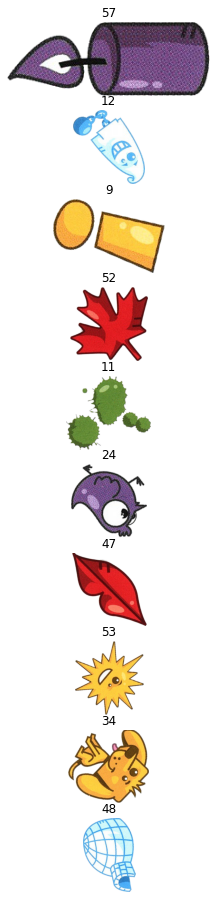

In [3]:
import matplotlib.pyplot as plt

# let us display the images
plt.figure(figsize=(8,16))
for ii in range(10):
    plt.subplot(10,2,1+2*ii)
    plt.imshow(train[ii])
    plt.title(label=labels[ii])
    plt.axis("off")

In [13]:
samples = []

for (i, img) in enumerate(train):
    img_masked = img[~masks[i]]
    indices = np.random.choice(img_masked.shape[0], 50, replace=False)
    sample = img_masked[indices]

    samples.append(sample)

super_sample = np.vstack(samples)

super_sample.shape

(14250, 3)

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=24, random_state=42)

kmeans.fit(super_sample)

print(kmeans.cluster_centers_)

[[ 68.11686144  93.10350584  33.11185309]
 [193.20720721 239.33933934 249.26426426]
 [245.48320896 164.60447761  76.05037313]
 [ 42.55766793  42.56907478  35.01267427]
 [227.03011292  35.67879548  39.38644918]
 [ 71.77419355 160.89516129 228.6344086 ]
 [189.18412698 178.04761905 180.46031746]
 [ 94.81395349  69.62611807  98.78711986]
 [153.79768786  28.36416185  24.47591522]
 [249.88057901 251.34077201 250.19963812]
 [244.15007899 120.14060032  63.52764613]
 [ 19.0066586   18.70338983  17.99878935]
 [ 80.93925234  25.39563863  10.7165109 ]
 [179.87139108  83.62729659  42.15485564]
 [252.28225806 201.82258065  69.36021505]
 [222.48955916 210.41763341 203.81206497]
 [146.50965251 134.64864865 142.39382239]
 [ 96.97251586 187.38900634 246.74841438]
 [ 96.21969697 131.59090909  52.20995671]
 [119.86730769  88.50576923 130.34038462]
 [104.24886878  60.02941176  23.19909502]
 [168.20618557 193.2371134  116.35051546]
 [ 44.20491803 118.03278689 178.72131148]
 [ 54.16777042  55.9183223   74.84

<BarContainer object of 24 artists>

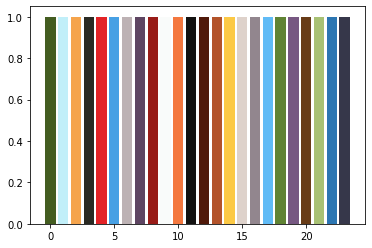

In [19]:
color_lut = np.uint8(kmeans.cluster_centers_)
plt.bar(np.arange(len(color_lut)), 
         np.ones(len(color_lut)), 
         color=color_lut/255)